# How to Turn the Tide
## An Analysis on Timeouts and Momentum
## Individual Team #1


## Import Libraries

In [216]:
import pandas as pd
import numpy as np
from scipy import stats
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Import Data

In [2]:
box_scores_df = pd.read_csv("Box_Scores.csv", compression="gzip", 
                            encoding = "ISO-8859-1")
box_scores_df

,Game_id,Person_id,Team_id,First_Name,Last_Name,minutes,Field_Goals,Field_Goals_Attempted,Field_Goal_Percentage,Three_Pointers,...,Fast_Break_Points,Triple_Doubles,Double_Doubles,actual_minutes,actual_seconds,Plus_Minus,Blocks_Against,PTS_OFF_TO,Second_Chance_PTS,Total_Rebounds
0,20300001,224,1610612748,Eddie,Jones,39,5,15,0.333,1,...,0.0,0.0,0.0,39,0,-7,0.0,2,2,8.0
1,20300001,243,1610612755,Aaron,McKie,24,3,7,0.429,2,...,2.0,0.0,0.0,24,0,15,0.0,5,3,4.0
2,20300001,258,1610612748,Brian,Grant,29,4,5,0.800,0,...,0.0,0.0,0.0,29,0,-11,1.0,0,4,7.0
3,20300001,727,1610612755,Eric,Snow,31,0,5,0.000,0,...,1.0,0.0,0.0,31,0,11,1.0,1,0,4.0
4,20300001,902,1610612748,Vernell,Coles,5,0,0,0.000,0,...,0.0,0.0,0.0,5,0,-4,0.0,0,0,0.0
5,20300001,934,1610612755,Derrick,Coleman,31,3,8,0.375,1,...,0.0,0.0,0.0,31,0,3,0.0,3,1,5.0
6,20300001,947,1610612755,Allen,Iverson,45,9,25,0.360,3,...,10.0,0.0,1.0,45,0,11,0.0,4,2,5.0
7,20300001,955,1610612748,Samaki,Walker,9,3,4,0.750,0,...,0.0,0.0,0.0,9,0,0,0.0,0,2,3.0
8,20300001,961,1610612748,John,Wallace,28,4,9,0.444,0,...,2.0,0.0,0.0,28,0,-20,0.0,2,0,4.0
9,20300001,1043,1610612755,Amal,McCaskill,11,1,1,1.000,0,...,0.0,0.0,0.0,11,0,17,0.0,2,0,4.0


In [377]:
team_mapping_df = pd.read_csv("Team_Mapping_Table.csv", compression='gzip')
team_mapping_df

,Team_id,Season_id,Arena_id,Conference_id,Division_id,Short_Name,Nickname,City,State,Country
0,1610612737,22003,135.0,East,Central,Atlanta,Hawks,Atlanta,GA,USA
1,1610612737,22004,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
2,1610612737,22005,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
3,1610612737,22006,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
4,1610612737,22007,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
5,1610612737,22008,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
6,1610612737,22009,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
7,1610612737,22010,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
8,1610612737,22011,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
9,1610612737,22012,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA


In [378]:
team_mapping_df.Team_id.unique()

array([1610612737, 1610612738, 1610612739, 1610612740, 1610612741,
       1610612742, 1610612743, 1610612744, 1610612745, 1610612746,
       1610612747, 1610612748, 1610612749, 1610612750, 1610612751,
       1610612752, 1610612753, 1610612754, 1610612755, 1610612756,
       1610612757, 1610612758, 1610612759, 1610612760, 1610612761,
       1610612762, 1610612763, 1610612764, 1610612765, 1610612766], dtype=int64)

In [4]:
pd.read_csv("Players_on_Court_Table.csv", compression="gzip", nrows=100)

,Game_id,Event_Num,WC_Time,Team_id,Period,Player1,Player2,Player3,Player4,Player5
0,20300001,0,549198,1610612748,1,224,258,1885,2548,2617
1,20300001,0,549198,1610612755,1,727,934,947,1903,2422
2,20300001,1,549259,1610612748,1,224,258,1885,2548,2617
3,20300001,1,549259,1610612755,1,727,934,947,1903,2422
4,20300001,2,549469,1610612748,1,224,258,1885,2548,2617
5,20300001,2,549469,1610612755,1,727,934,947,1903,2422
6,20300001,3,549484,1610612748,1,224,258,1885,2548,2617
7,20300001,3,549484,1610612755,1,727,934,947,1903,2422
8,20300001,5,549732,1610612748,1,224,258,1885,2548,2617
9,20300001,5,549732,1610612755,1,727,934,947,1903,2422


In [5]:
lineups_df = pd.read_csv("Game_Lineup.csv", compression="gzip")
lineups_df

,Game_id,Period,Person_id,Team_id,status
0,20300001,0,224,1610612748,A
1,20300001,0,243,1610612755,A
2,20300001,0,258,1610612748,A
3,20300001,0,299,1610612755,A
4,20300001,0,727,1610612755,A
5,20300001,0,902,1610612748,A
6,20300001,0,934,1610612755,A
7,20300001,0,947,1610612755,A
8,20300001,0,955,1610612748,A
9,20300001,0,961,1610612748,A


## Collecting All Timeout Data

In [6]:
chunk_num = 0
found = False
first_relevant = True
for plays_chunk_df in pd.read_csv("Play_by_Play_data.csv", compression="gzip", 
                                  encoding = "ISO-8859-1", chunksize=500000):
    chunk_num += 1
    print(chunk_num)
    relevant_rows = plays_chunk_df[plays_chunk_df.Game_id.apply(lambda row: str(row)[1:3]).isin(['14', '15', '16', '17', '18'])]
    if len(relevant_rows) > 0:
        if first_relevant:
            relevant_rows.to_csv('Play_by_Play_data_2014_2018.csv')
            first_relevant = False
        else:
            relevant_rows.to_csv('Play_by_Play_data_2014_2018.csv', mode='a', header=False)

pd.read_csv('Play_by_Play_data_2014_2018.csv')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


MemoryError: 

In [33]:
chunk_num = 0
chunk_game_ids = []

for plays_df in pd.read_csv('Play_by_Play_data_2014_2018.csv', chunksize=200000):
    chunk_num += 1
    chunk_game_ids.append(plays_df.Game_id.unique())
    print(chunk_num)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [28]:
game_ids = pd.read_csv("Play_by_Play_data.csv", compression="gzip", usecols=['Game_id']).Game_id.unique()
game_ids

array([20300001, 20300002, 20300003, ..., 41800404, 41800405, 41800406], dtype=int64)

In [6]:
def get_timeout_team(row):
    text = row['Description']
    try:
        return text.split('[', 1)[1].split(']')[0]
    except:
        print(row['Description'])

In [7]:
def get_player_team(player_id, game_id, lineups_data):
    return lineups_data[(lineups_data['Game_id'] == game_id) & 
           (lineups_data['Person_id'] == player_id)]['Team_id'].iloc[0]

def calculate_score_difference_at_timeout(row, play_by_play_data, lineups_data):
    game_id = row['Game_id']
    timeout_team_id = row['Person1']
    time_passed = calculate_time_passed_in_game(row)

    made_shots_df = play_by_play_data[(play_by_play_data['Game_id'] == game_id) & 
                    ((play_by_play_data['Event_Msg_Type'] == 1) | 
                     ((play_by_play_data['Event_Msg_Type'] == 3) & 
                      (play_by_play_data['Option1'] == 1)))].copy()

    made_shots_df['Scoring_team_id'] = made_shots_df.apply(lambda row: get_player_team(row['Person1'], row['Game_id'], lineups_df), axis=1)
    made_shots_df['Time_passed'] = made_shots_df.apply(lambda row: calculate_time_passed_in_game(row), axis=1)
    last_points_info = made_shots_df[made_shots_df['Time_passed'] < time_passed].sort_values(['Time_passed'], ascending=False).iloc[0]
    scoring_team = get_player_team(last_points_info['Person1'], game_id, lineups_df)
    text = last_points_info['Description']
    scoretext = text.split('[', 1)[1].split(']')[0].split(' ')[1]
    team_score_1 = int(scoretext.split('-')[0]) if len(scoretext.split('-')[0]) > 0 else 0
    team_score_2 = int(scoretext.split('-')[1]) if len(scoretext.split('-')[1]) > 0 else 0
    if scoring_team == timeout_team_id: return team_score_1 - team_score_2
    else: return team_score_2 - team_score_1
    

def calculate_time_passed_in_game(row):
    return int(7200 * row['Period'] - row['PC_Time'])
    
def calculate_time_left_in_game(row):
    if row['Period'] <= 4:
        return int(row['PC_Time'] + 7200 * (4 - row['Period']))
    else:
        return int(row['PC_Time'])

def retrieve_timeout_data(row, lineups_data, play_by_play_data):
    return pd.Series([row['Game_id'], 
                      row['PC_Time'], 
                      row['SC_Time'], 
                      calculate_time_left_in_game(row), 
                      row['Person1'], 
#                       calculate_score_difference_at_timeout(row, play_by_play_data, lineups_df), 
                      calculate_time_passed_in_game(row)],
                     index=['Game ID', 'Time Left in Quarter', 
                            'Shot Clock Remaining', 'Time Left in Game', 
                            'Team Calling Timeout', 
#                             'Score Difference', 
                            'Time Passed in Game'])

chunk_num = 0
all_timeouts_df = pd.DataFrame(columns=['Game ID', 'Time Left in Quarter', 'Shot Clock Remaining', 
                                        'Time Left in Game', 'Team Calling Timeout', 
#                                         'Score Difference', 
                                        'Time Passed in Game'])
for plays_chunk_df in pd.read_csv("Play_by_Play_data_2014_2018.csv", chunksize=200000):
    chunk_num += 1
    print("On chunk", chunk_num)
    timeouts_df = plays_chunk_df[(plays_chunk_df['Event_Msg_Type'] == 9) & 
                                 ((plays_chunk_df['Action_Type'] == 1) | 
                                  (plays_chunk_df['Action_Type'] == 2))]
    timeouts_info_df = timeouts_df.apply(lambda row: retrieve_timeout_data(row, lineups_df, plays_chunk_df), axis=1)
    all_timeouts_df = pd.concat([all_timeouts_df, timeouts_info_df], sort=True)
    
all_timeouts_df

On chunk 1
On chunk 2
On chunk 3
On chunk 4
On chunk 5
On chunk 6


KeyboardInterrupt: 

In [31]:
all_timeouts_df

,Game ID,Shot Clock Remaining,Team Calling Timeout,Time Left in Game,Time Left in Quarter,Time Passed in Game
62,21400001,-1,1610612740,24840,3240,3960
95,21400001,20,1610612753,23370,1770,5430
212,21400001,18,1610612753,18320,3920,10480
239,21400001,24,1610612740,16790,2390,12010
274,21400001,-1,1610612753,14744,344,14056
345,21400001,-1,1610612740,10600,3400,18200
382,21400001,17,1610612753,8700,1500,20100
442,21400001,-1,1610612740,5310,5310,23490
505,21400001,19,1610612753,2590,2590,26210
520,21400001,0,1610612753,1790,1790,27010


In [29]:
all_timeouts_df.astype('int64').to_csv("timeouts_data_2014_2018.csv")

In [8]:
all_timeouts_df = pd.read_csv("timeouts_data_2014_2018.csv")
all_timeouts_df

,Unnamed: 0,Game ID,Shot Clock Remaining,Team Calling Timeout,Time Left in Game,Time Left in Quarter,Time Passed in Game
0,62,21400001,-1,1610612740,24840,3240,3960
1,95,21400001,20,1610612753,23370,1770,5430
2,212,21400001,18,1610612753,18320,3920,10480
3,239,21400001,24,1610612740,16790,2390,12010
4,274,21400001,-1,1610612753,14744,344,14056
5,345,21400001,-1,1610612740,10600,3400,18200
6,382,21400001,17,1610612753,8700,1500,20100
7,442,21400001,-1,1610612740,5310,5310,23490
8,505,21400001,19,1610612753,2590,2590,26210
9,520,21400001,0,1610612753,1790,1790,27010


## Collecting Momentum Indexes

In [9]:
def best_fit_slope(X, Y):
    if (len(X) == 0 or len(Y) == 0): return 0
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum

    return b

In [182]:
n = 6
timeout_info = all_timeouts_df.iloc[0]
made_shots_df = play_by_play_df[(play_by_play_df['Game_id'] == timeout_info['Game ID']) & 
                ((play_by_play_df['Event_Msg_Type'] == 1) | 
                 ((play_by_play_df['Event_Msg_Type'] == 3) & 
                  (play_by_play_df['Option1'] == 1)))].copy()

made_shots_df['Scoring_team_id'] = made_shots_df.apply(lambda row: get_player_team(row['Person1'], row['Game_id'], lineups_df), axis=1)
made_shots_df['Time_passed'] = made_shots_df.apply(lambda row: calculate_time_passed_in_game(row), axis=1)
last_scoring_df = made_shots_df[made_shots_df['Time_passed'] > timeout_info['Time Passed in Game']].sort_values(['Time_passed', 'WC_Time'], ascending=[True, True]).iloc[:n]

score_differences = []
for index, row in last_scoring_df.sort_values(['Time_passed', 'WC_Time'], ascending=[True, True]).iterrows():
    print(row['Description'])
    scoring_team = get_player_team(row['Person1'], timeout_info['Game ID'], lineups_df)
    text = row['Description']
    scoretext = text.split('[', 1)[1].split(']')[0].split(' ')[1]
    team_score_1 = int(scoretext.split('-')[0]) if len(scoretext.split('-')[0]) > 0 else 0
    team_score_2 = int(scoretext.split('-')[1]) if len(scoretext.split('-')[1]) > 0 else 0
    if row['Scoring_team_id'] == timeout_info["Team Calling Timeout"]: score_differences.append(team_score_1 - team_score_2)
    else: score_differences.append(team_score_2 - team_score_1)
print(score_differences)
print(best_fit_slope(np.arange(1,n+1), np.array(score_differences)))

(5:19) [PHL 14-10] Iverson Running Jump: Made (4 PTS)  Assist: Salmons (1 AST)
(4:58) [MIA 12-14] Wade Running Jump: Made (6 PTS)  Assist: Haslem (1 AST)
(4:21) [PHL 15-12] Salmons Free Throw 2 of 2 (6 PTS)
(4:02) [MIA 14-15] Wade Driving Layup: Made (8 PTS)
(3:46) [PHL 17-14] Salmons Driving Layup: Made (8 PTS)  Assist: Iverson (2 AST)
(2:51) [PHL 18-14] Iverson Free Throw 2 of 2 (5 PTS)
[4, 2, 3, 1, 3, 4]
0.0285714285714


In [43]:
all_timeouts_df

,Game ID,Shot Clock Remaining,Team Calling Timeout,Time Left in Game,Time Left in Quarter,Time Passed in Game
62,21400001,-1,1610612740,24840,3240,3960
95,21400001,20,1610612753,23370,1770,5430
212,21400001,18,1610612753,18320,3920,10480
239,21400001,24,1610612740,16790,2390,12010
274,21400001,-1,1610612753,14744,344,14056
345,21400001,-1,1610612740,10600,3400,18200
382,21400001,17,1610612753,8700,1500,20100
442,21400001,-1,1610612740,5310,5310,23490
505,21400001,19,1610612753,2590,2590,26210
520,21400001,0,1610612753,1790,1790,27010


In [129]:
last_game_id = 21400001
chunk_num = 0
for shots_chunk in pd.read_csv('Made_shots_data_2014_2018.csv', chunksize=1000):
    chunk_num += 1
    print(chunk_num)
    sorted_shots = shots_chunk.sort_values(['Game_id','Time_passed', 'WC_Time', 'Event_Num'], ascending=[True, True, True, True])
    if sorted_shots.iloc[0].Game_id != last_game_id: print(chunk_num, last_game_id)
    last_game_id = sorted_shots.iloc[-1].Game_id
    if chunk_num == 1:
        sorted_shots.to_csv('Made_shots_data_2014_2018_sorted_2.csv')
    else:
        sorted_shots.to_csv('Made_shots_data_2014_2018_sorted_2.csv', mode='a', header=False)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
157 21500195
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274

In [96]:
last_game_id = 21400001
chunk_num = -1
for shots_chunk in pd.read_csv('Made_shots_data_2014_2018.csv', chunksize=1000):
    chunk_num += 1
#     print(chunk_num)
    sorted_shots = shots_chunk.sort_values(['Game_id','Time_passed', 'WC_Time', 'Event_Num'], ascending=[True, True, True, True])
    if sorted_shots.iloc[0].Game_id != last_game_id: print(chunk_num, last_game_id, sorted_shots.iloc[0].Game_id)
    last_game_id = sorted_shots.iloc[-1].Game_id
    

156 21500195 21500196
343 21600628 21600629


In [9]:
pd.read_csv('Made_shots_data_2014_2018_sorted.csv', nrows=10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Game_id,Event_Num,Event_Msg_Type,Description,Period,WC_Time,PC_Time,...,Action_Type,Option1,Option2,Team_id,Person1,Person2,Person3,Team_id_type,Scoring_team_id,Time_passed
0,1000,4464,6264144,21400009,435,1,(7:00)[MIN 87-85] Bennett Jump Shot: Made (9 P...,4,650024,4200,...,1,2,0,1610612750,203461,2590,0,3,1610612750,24600
1,1001,4470,6264150,21400009,441,1,(6:12)[MEM 87-87] Conley Driving Layup Shot: M...,4,651120,3720,...,42,2,0,1610612763,201144,0,0,2,1610612763,25080
2,1002,4473,6264153,21400009,444,1,(5:41)[MEM 89-87] Randolph Turnaround Jump Sho...,4,651426,3410,...,47,2,0,1610612763,2216,201144,0,2,1610612763,25390
3,1003,4485,6264165,21400009,456,1,(5:19)[MIN 89-89] Pekovic Layup Shot: Made (5 ...,4,653097,3190,...,5,2,0,1610612750,201593,0,0,3,1610612750,25610
4,1004,4486,6264166,21400009,457,1,(5:06)[MEM 91-89] Randolph Layup Shot: Made (2...,4,653248,3060,...,5,2,0,1610612763,2216,201584,0,2,1610612763,25740
5,1005,4488,6264168,21400009,459,3,(5:06)[MEM 92-89] Randolph Free Throw 1 of 1 (...,4,653426,3060,...,10,1,0,1610612763,2216,0,0,2,1610612763,25740
6,1006,4489,6264169,21400009,461,1,(4:51)[MIN 92-92] Muhammad 3pt Shot: Made (13 ...,4,653776,2910,...,1,3,0,1610612750,203498,201937,0,3,1610612750,25890
7,1007,4498,6264178,21400009,470,3,(3:53)[MIN 93-92] Young Free Throw 1 of 2 (21 ...,4,654779,2330,...,11,1,0,1610612750,201152,0,0,3,1610612750,26470
8,1008,4499,6264179,21400009,472,3,(3:53)[MIN 94-92] Young Free Throw 2 of 2 (22 ...,4,654868,2330,...,12,1,0,1610612750,201152,0,0,3,1610612750,26470
9,1009,4502,6264182,21400009,476,3,(3:41)[MEM 93-94] Gasol Free Throw 1 of 2 (27 ...,4,655505,2210,...,11,1,0,1610612763,201188,0,0,2,1610612763,26590


In [15]:
game_start_indices = {}
chunk_num = -1
for made_shots_df in pd.read_csv('Made_shots_data_2014_2018_sorted_2.csv', chunksize=20000):
    chunk_num += 1
    print(chunk_num)
    for game_id in made_shots_df.Game_id.unique():
        if game_id not in game_start_indices:
            game_start_indices[game_id] = made_shots_df[made_shots_df.Game_id == game_id].index[0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [140]:
pd.read_csv('Made_shots_data_2014_2018.csv', skiprows=np.arange(1, 454), nrows=(561-453))

,Unnamed: 0,Unnamed: 0.1,Game_id,Event_Num,Event_Msg_Type,Description,Period,WC_Time,PC_Time,SC_Time,...,Action_Type,Option1,Option2,Team_id,Person1,Person2,Person3,Team_id_type,Scoring_team_id,Time_passed
0,2109,6261789,21400005,9,1,(11:10)[PHI 2-0] Wroten Driving Finger Roll La...,1,548965,6700,19,...,75,2,1,1610612755,203100,0,0,3,1610612755,500
1,2110,6261790,21400005,10,1,(10:53)[IND 2-2] Scola Jump Shot: Made (2 PTS)...,1,549135,6530,9,...,1,2,0,1610612754,2449,202388,0,2,1610612754,670
2,2111,6261791,21400005,11,1,(10:32)[PHI 4-2] Johnson Pullup Jump shot: Mad...,1,549348,6320,8,...,79,2,0,1610612755,203187,0,0,3,1610612755,880
3,2112,6261792,21400005,12,1,(10:08)[IND 5-4] Hill 3pt Shot: Made (3 PTS) A...,1,549592,6080,7,...,1,3,0,1610612754,203524,202388,0,2,1610612754,1120
4,2114,6261794,21400005,14,1,(9:47)[PHI 6-5] Sims Jump Shot: Made (2 PTS) A...,1,549959,5870,6,...,1,2,0,1610612755,203156,203100,0,3,1610612755,1330
5,2119,6261799,21400005,19,1,(9:14)[PHI 8-5] Sims Jump Shot: Made (4 PTS) A...,1,550791,5540,17,...,1,2,0,1610612755,203156,203138,0,3,1610612755,1660
6,2140,6261820,21400005,40,1,(7:16)[PHI 10-5] Wroten Slam Dunk Shot: Made (...,1,552800,4360,21,...,8,2,1,1610612755,203100,0,0,3,1610612755,2840
7,2144,6261824,21400005,44,1,(6:58)[IND 7-10] Scola Slam Dunk Shot: Made (4...,1,553114,4180,24,...,8,2,1,1610612754,2449,0,0,2,1610612754,3020
8,2145,6261825,21400005,45,1,(6:38)[PHI 12-7] Johnson Driving Layup Shot: M...,1,553310,3980,12,...,42,2,0,1610612755,203187,203100,0,3,1610612755,3220
9,2149,6261829,21400005,49,3,(6:20)[IND 8-12] Hibbert Free Throw 1 of 2 (1 ...,1,553588,3800,-1,...,11,1,0,1610612754,201579,0,0,2,1610612754,3400


In [136]:
game_start_indices[21400006]

561

In [8]:
# def momentum_index_before_timeout(timeout_info, n):
#     game_id = timeout_info['Game ID']
    
#     if game_id+1 in game_start_indices:
#         all_made_shots_df = pd.read_csv('Made_shots_data_2014_2018_sorted_2.csv', 
#                                         skiprows=np.arange(1, game_start_indices[game_id]+1), 
#                                         nrows=(game_start_indices[game_id+1]-game_start_indices[game_id]))
#     else:
#         all_made_shots_df = pd.read_csv('Made_shots_data_2014_2018_sorted_2.csv', 
#                                         skiprows=np.arange(1, game_start_indices[game_id]+1)) 

#     last_scoring_df = all_made_shots_df[all_made_shots_df['Time_passed'] < timeout_info['Time Passed in Game']].iloc[-n:]
#     score_differences = []    
    
#     for index, row in last_scoring_df.iterrows():
#         scoring_team = row['Scoring_team_id']
#         text = row['Description']
#         scoretext = text.split('[', 1)[1].split(']')[0].split(' ')[1]
#         team_score_1 = int(scoretext.split('-')[0]) if len(scoretext.split('-')[0]) > 0 else 0
#         team_score_2 = int(scoretext.split('-')[1]) if len(scoretext.split('-')[1]) > 0 else 0
#         if row['Scoring_team_id'] == timeout_info["Team Calling Timeout"]: score_differences.append(team_score_1 - team_score_2)
#         else: score_differences.append(team_score_2 - team_score_1)
   
#     return {'momentum_index': best_fit_slope(np.arange(1,len(score_differences)+1), np.array(score_differences)), 
#             'score_differences': str(list(np.array(score_differences)))}


# def momentum_index_after_timeout(timeout_info, n):
#     game_id = timeout_info['Game ID']
#     chunk_num = -1
#     for plays_df in pd.read_csv('Play_by_Play_data_2014_2018.csv', chunksize=200000):
#         chunk_num += 1
#         made_shots_df = None
#         if game_id in chunk_game_ids[chunk_num]:
#             made_shots_in_chunk_df = plays_df[(plays_df['Game_id'] == game_id) & 
#                                     ((plays_df['Event_Msg_Type'] == 1) | 
#                                      ((plays_df['Event_Msg_Type'] == 3) & 
#                                       (plays_df['Option1'] == 1)))].copy()
#             made_shots_df = pd.concat([made_shots_df, made_shots_in_chunk_df])

#     made_shots_df['Scoring_team_id'] = made_shots_df.apply(lambda row: get_player_team(row['Person1'], row['Game_id'], lineups_df), axis=1)
#     made_shots_df['Time_passed'] = made_shots_df.apply(lambda row: calculate_time_passed_in_game(row), axis=1)
#     last_scoring_df = made_shots_df[made_shots_df['Time_passed'] > timeout_info['Time Passed in Game']].sort_values(['Time_passed', 'WC_Time'], ascending=[True, True]).iloc[:n]

#     score_differences = []
    
#     for index, row in last_scoring_df.sort_values(['Time_passed', 'WC_Time'], ascending=[True, True]).iterrows():
#         scoring_team = get_player_team(row['Person1'], timeout_info['Game ID'], lineups_df)
#         text = row['Description']
#         scoretext = text.split('[', 1)[1].split(']')[0].split(' ')[1]
#         team_score_1 = int(scoretext.split('-')[0]) if len(scoretext.split('-')[0]) > 0 else 0
#         team_score_2 = int(scoretext.split('-')[1]) if len(scoretext.split('-')[1]) > 0 else 0
#         if row['Scoring_team_id'] == timeout_info["Team Calling Timeout"]: score_differences.append(team_score_1 - team_score_2)
#         else: score_differences.append(team_score_2 - team_score_1)
            
#     if (len(score_differences) == 0): return 0        
#     return best_fit_slope(np.arange(1,len(score_differences)+1), np.array(score_differences))

In [10]:
all_timeouts_df = pd.read_csv('timeouts_data_2014_2018.csv').set_index('Unnamed: 0')
all_timeouts_df

,Game ID,Shot Clock Remaining,Team Calling Timeout,Time Left in Game,Time Left in Quarter,Time Passed in Game
Unnamed: 0,,,,,,
62,21400001,-1,1610612740,24840,3240,3960
95,21400001,20,1610612753,23370,1770,5430
212,21400001,18,1610612753,18320,3920,10480
239,21400001,24,1610612740,16790,2390,12010
274,21400001,-1,1610612753,14744,344,14056
345,21400001,-1,1610612740,10600,3400,18200
382,21400001,17,1610612753,8700,1500,20100
442,21400001,-1,1610612740,5310,5310,23490
505,21400001,19,1610612753,2590,2590,26210


In [29]:
count = -1
n = 6
for game_id in all_timeouts_df['Game ID'].unique():
    if game_id+1 in game_start_indices:
        all_made_shots_df = pd.read_csv('Made_shots_data_2014_2018_sorted_2.csv', 
                                        skiprows=np.arange(1, game_start_indices[game_id]+1), 
                                        nrows=(game_start_indices[game_id+1]-game_start_indices[game_id]))
    else:
        all_made_shots_df = pd.read_csv('Made_shots_data_2014_2018_sorted_2.csv', 
                                        skiprows=np.arange(1, game_start_indices[game_id]+1)) 
    game_timeouts_df = all_timeouts_df[all_timeouts_df['Game ID'] == game_id]
    for index, timeout_info in game_timeouts_df.iterrows():
        last_scoring_df = all_made_shots_df[all_made_shots_df['Time_passed'] < timeout_info['Time Passed in Game']].iloc[-n:]
        score_differences = []
        for i, row in last_scoring_df.iterrows():
            scoring_team = row['Scoring_team_id']
            text = row['Description']
            scoretext = text.split('[', 1)[1].split(']')[0].split(' ')[1]
            team_score_1 = int(scoretext.split('-')[0]) if len(scoretext.split('-')[0]) > 0 else 0
            team_score_2 = int(scoretext.split('-')[1]) if len(scoretext.split('-')[1]) > 0 else 0
            if row['Scoring_team_id'] == timeout_info["Team Calling Timeout"]: score_differences.append(team_score_1 - team_score_2)
            else: score_differences.append(team_score_2 - team_score_1)
            
        row_info = {'momentum_index': best_fit_slope(np.arange(1,len(score_differences)+1), np.array(score_differences)), 
                    'score_differences': str(list(np.array(score_differences)))}
        
        count += 1
        if count % 1000 == 0: print(count)
        
        pd.DataFrame(row_info, index=[index]).to_csv('Momentum_before_data_2014_2018_2.csv', mode='a', header=False)

0
1000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000


In [46]:
count = -1
n = 6
for game_id in all_timeouts_df['Game ID'].unique():
    if game_id+1 in game_start_indices:
        all_made_shots_df = pd.read_csv('Made_shots_data_2014_2018_sorted_2.csv', 
                                        skiprows=np.arange(1, game_start_indices[game_id]+1), 
                                        nrows=(game_start_indices[game_id+1]-game_start_indices[game_id]))
    else:
        all_made_shots_df = pd.read_csv('Made_shots_data_2014_2018_sorted_2.csv', 
                                        skiprows=np.arange(1, game_start_indices[game_id]+1)) 
    game_timeouts_df = all_timeouts_df[all_timeouts_df['Game ID'] == game_id]
    for index, timeout_info in game_timeouts_df.iterrows():
        last_scoring_df = all_made_shots_df[all_made_shots_df['Time_passed'] > timeout_info['Time Passed in Game']].iloc[:n]
        score_differences = []
        for i, row in last_scoring_df.iterrows():
            scoring_team = row['Scoring_team_id']
            text = row['Description']
            scoretext = text.split('[', 1)[1].split(']')[0].split(' ')[1]
            team_score_1 = int(scoretext.split('-')[0]) if len(scoretext.split('-')[0]) > 0 else 0
            team_score_2 = int(scoretext.split('-')[1]) if len(scoretext.split('-')[1]) > 0 else 0
            if row['Scoring_team_id'] == timeout_info["Team Calling Timeout"]: score_differences.append(team_score_1 - team_score_2)
            else: score_differences.append(team_score_2 - team_score_1)
            
        row_info = {'momentum_index': best_fit_slope(np.arange(1,len(score_differences)+1), np.array(score_differences)), 
                    'score_differences': str(list(np.array(score_differences)))}
        
        count += 1
        if count % 1000 == 0: print(count)
        
        pd.DataFrame(row_info, index=[index]).to_csv('Momentum_after_data_2014_2018_2.csv', mode='a', header=False)

0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000


In [11]:
momentum_before_df = pd.read_csv('Momentum_before_data_2014_2018_2.csv')
momentum_before_df

,Unnamed: 0,momentum_index,score_differences
0,62,-0.085714,"[3, 0, 2, 0, 3, 1]"
1,95,-0.285714,"[3, 4, 6, 4, 3, 2]"
2,212,-0.314286,"[3, 1, 3, 4, 2, 0]"
3,239,0.514286,"[0, 2, 0, 2, 4, 2]"
4,274,-0.742857,"[-4, -2, -4, -6, -5, -7]"
5,345,0.285714,"[0, 2, -1, 1, 3, 1]"
6,382,-0.142857,"[-2, -3, -4, -6, -4, -2]"
7,442,-0.028571,"[13, 12, 11, 13, 11, 13]"
8,505,-0.571429,"[-13, -14, -15, -16, -17, -15]"
9,520,-0.600000,"[-15, -16, -17, -15, -17, -19]"


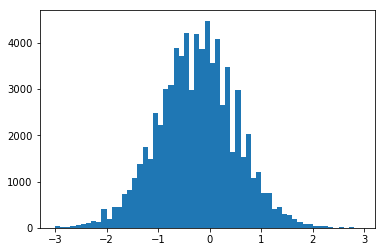

In [12]:
plt.hist(momentum_before_df.momentum_index.fillna(0), bins=np.arange(-3, 3, 0.1));

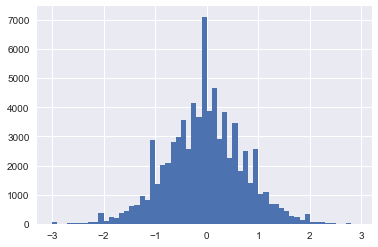

In [12]:
momentum_after_df = pd.read_csv('Momentum_after_data_2014_2018_2.csv')

plt.hist(momentum_after_df.momentum_index.fillna(0), bins=np.arange(-3, 3, 0.1));

In [100]:
team_mapping_df

,Team_id,Season_id,Arena_id,Conference_id,Division_id,Short_Name,Nickname,City,State,Country
0,1610612737,22003,135.0,East,Central,Atlanta,Hawks,Atlanta,GA,USA
1,1610612737,22004,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
2,1610612737,22005,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
3,1610612737,22006,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
4,1610612737,22007,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
5,1610612737,22008,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
6,1610612737,22009,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
7,1610612737,22010,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
8,1610612737,22011,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA
9,1610612737,22012,135.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA


In [24]:
momentum_before_df

,Unnamed: 0,momentum_index,score_differences
0,62,-0.085714,"[3, 0, 2, 0, 3, 1]"
1,95,-0.285714,"[3, 4, 6, 4, 3, 2]"
2,212,-0.314286,"[3, 1, 3, 4, 2, 0]"
3,239,0.514286,"[0, 2, 0, 2, 4, 2]"
4,274,-0.742857,"[-4, -2, -4, -6, -5, -7]"
5,345,0.285714,"[0, 2, -1, 1, 3, 1]"
6,382,-0.142857,"[-2, -3, -4, -6, -4, -2]"
7,442,-0.028571,"[13, 12, 11, 13, 11, 13]"
8,505,-0.571429,"[-13, -14, -15, -16, -17, -15]"
9,520,-0.600000,"[-15, -16, -17, -15, -17, -19]"


In [28]:
momentum_before_df[all_timeouts_df['Game ID'].apply(lambda row: str(row)[1:3]).isin(['15']).values]

,Unnamed: 0,momentum_index,score_differences
14471,597763,-0.542857,"[-2, 0, -1, -4, -2, -4]"
14472,597816,0.171429,"[6, 8, 9, 7, 9, 7]"
14473,597850,-2.400000,"[7, 5, 3, 0, -2, -5]"
14474,597931,-1.314286,"[3, 5, 2, 0, -3, -1]"
14475,597982,-1.657143,"[-3, -1, -3, -5, -8, -10]"
14476,598031,-0.685714,"[17, 18, 16, 13, 16, 14]"
14477,598079,0.371429,"[-16, -18, -16, -15, -14, -16]"
14478,598112,0.400000,"[14, 16, 18, 16, 18, 16]"
14479,598199,0.228571,"[-9, -8, -9, -8, -9, -7]"
14480,598279,0.342857,"[-6, -4, -6, -3, -6, -3]"


## Comparing Average Momentum Index Difference Across Teams

In [446]:
def form_team_name(short_name, nickname):
    if nickname not in short_name:
        return short_name + " " + nickname
    return short_name

team_mapping_recent_df = team_mapping_df[team_mapping_df.Season_id == 22018]
team_mapping_recent_df['Team_Name'] = team_mapping_recent_df.apply(lambda row: form_team_name(row['Short_Name'], 
                                                                                              row['Nickname']), axis=1)
team_mapping_recent_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Team_id,Season_id,Arena_id,Conference_id,Division_id,Short_Name,Nickname,City,State,Country,Team_Name
15,1610612737,22018,650.0,East,Southeast,Atlanta,Hawks,Atlanta,GA,USA,Atlanta Hawks
41,1610612738,22018,17.0,East,Atlantic,Boston,Celtics,Boston,MA,USA,Boston Celtics
70,1610612739,22018,22.0,East,Central,Cleveland,Cavaliers,Cleveland,OH,USA,Cleveland Cavaliers
95,1610612740,22018,160.0,West,Southwest,New Orleans,Pelicans,New Orleans,LA,USA,New Orleans Pelicans
117,1610612741,22018,66.0,East,Central,Chicago,Bulls,Chicago,IL,USA,Chicago Bulls
144,1610612742,22018,193.0,West,Southwest,Dallas,Mavericks,Dallas,TX,USA,Dallas Mavericks
172,1610612743,22018,139.0,West,Northwest,Denver,Nuggets,Denver,CO,USA,Denver Nuggets
199,1610612744,22018,71.0,West,Pacific,Golden State,Warriors,Golden State,CA,USA,Golden State Warriors
223,1610612745,22018,215.0,West,Southwest,Houston,Rockets,Houston,TX,USA,Houston Rockets
251,1610612746,22018,137.0,West,Pacific,LA Clippers,Clippers,LA,CA,USA,LA Clippers


In [16]:
momentum_before_df.momentum_index.fillna(0).mean()

-0.23789064572611232

In [17]:
momentum_after_df.momentum_index.fillna(0).mean()

-0.018436431717059897

In [14]:
momentum_difference_df = momentum_after_df.momentum_index.fillna(0) - momentum_before_df.momentum_index.fillna(0)

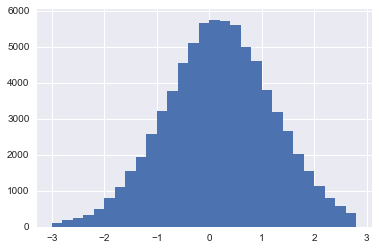

In [15]:
plt.hist(momentum_difference_df, bins=np.arange(-3, 3, 0.2));

In [449]:
momentum_difference_teams_df = pd.DataFrame({'Team Calling Timeout': list(all_timeouts_df['Team Calling Timeout']), 
                                             'momentum_index_difference': momentum_difference_df})

year_index = all_timeouts_df['Game ID'].apply(lambda row: str(row)[1:3]).isin(['15']).values
momentum_difference_teams_df = momentum_difference_teams_df[year_index]

avg_momentum_difference_teams_df = momentum_difference_teams_df.groupby('Team Calling Timeout').mean().sort_values(['momentum_index_difference'], ascending=False)

team_names = []
all_team_ids = list(team_mapping_recent_df.Team_id.unique())

for team_id, row in avg_momentum_difference_teams_df.iterrows():
    if team_id in all_team_ids:
        team_names.append(team_mapping_recent_df[team_mapping_recent_df.Team_id == team_id].Team_Name.iloc[0])
    else:
        team_names.append(np.NaN)

avg_momentum_difference_teams_df['team_name'] = team_names
avg_momentum_difference_teams_df = avg_momentum_difference_teams_df.dropna()
avg_momentum_difference_teams_df
# for val in avg_momentum_difference_teams_df[pd.notnull(avg_momentum_difference_teams_df.team_name)].momentum_index_difference.values:
#     print(val)

,momentum_index_difference,team_name
Team Calling Timeout,,
1610612747,0.301147,L.A. Lakers
1610612766,0.295874,Charlotte Hornets
1610612761,0.293826,Toronto Raptors
1610612741,0.286294,Chicago Bulls
1610612749,0.282447,Milwaukee Bucks
1610612756,0.275923,Phoenix Suns
1610612743,0.272344,Denver Nuggets
1610612765,0.259068,Detroit Pistons
1610612751,0.247756,Brooklyn Nets


In [234]:
(momentum_indices_difference > 0).sum()/len(momentum_indices_difference)

0.55546492659053837

(-2, 2)

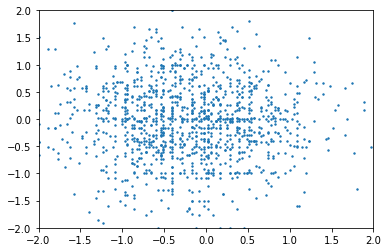

In [245]:
plt.scatter(list(momentum_indices_before), list(momentum_indices_after), s=2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

In [97]:
year_index = all_timeouts_df['Game ID'].apply(lambda row: str(row)[1:3]).isin(['15']).values

In [99]:
np.sum(year_index * (momentum_before_df.momentum_index < 0).values)

9572

In [453]:
momentum_difference_teams_df = pd.DataFrame({'Team Calling Timeout': list(all_timeouts_df['Team Calling Timeout']), 
                                             'momentum_index_difference': momentum_difference_df})

year_index = all_timeouts_df['Game ID'].apply(lambda row: str(row)[1:3]).isin(['18']).values
momentum_filter_index = (momentum_before_df.momentum_index < 0).values
momentum_difference_teams_df = momentum_difference_teams_df[year_index * momentum_filter_index]

avg_momentum_difference_teams_df = momentum_difference_teams_df.groupby('Team Calling Timeout').mean().sort_values(['momentum_index_difference'], ascending=False)

team_names = []
all_team_ids = list(team_mapping_recent_df.Team_id.unique())

for team_id, row in avg_momentum_difference_teams_df.iterrows():
    if team_id in all_team_ids:
        team_names.append(team_mapping_recent_df[team_mapping_recent_df.Team_id == team_id].Team_Name.iloc[0])
    else:
        team_names.append(np.NaN)

avg_momentum_difference_teams_df['team_name'] = team_names

# avg_momentum_difference_teams_df
# for val in avg_momentum_difference_teams_df[pd.notnull(avg_momentum_difference_teams_df.team_name)].momentum_index_difference.values:
#     print(val)
    
for val in avg_momentum_difference_teams_df[pd.notnull(avg_momentum_difference_teams_df.team_name)].team_name.values:
    print(val)

Detroit Pistons
Milwaukee Bucks
Toronto Raptors
Golden State Warriors
Portland Trail Blazers
Boston Celtics
New Orleans Pelicans
Denver Nuggets
Dallas Mavericks
New York Knicks
Oklahoma City Thunder
Washington Wizards
Sacramento Kings
L.A. Lakers
Utah Jazz
Philadelphia 76ers
Memphis Grizzlies
Indiana Pacers
Orlando Magic
San Antonio Spurs
Chicago Bulls
Atlanta Hawks
Minnesota Timberwolves
LA Clippers
Houston Rockets
Cleveland Cavaliers
Charlotte Hornets
Brooklyn Nets
Miami Heat
Phoenix Suns


## Visualization Creation

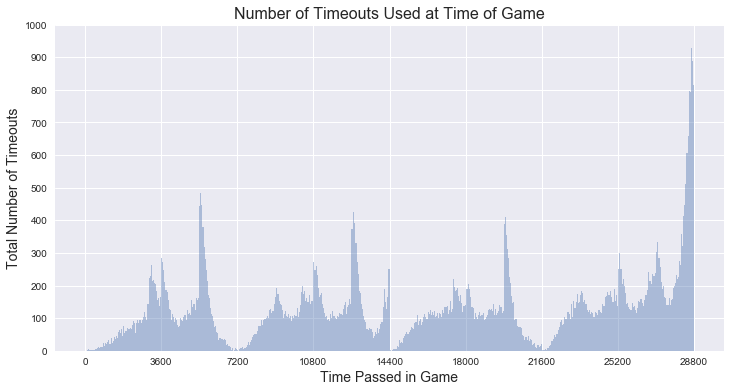

In [18]:
plt.figure(figsize=(12, 6))
sns.distplot(all_timeouts_df['Time Passed in Game'], bins = np.arange(0, 28801, 50), kde = False)
plt.xticks(np.arange(0, 28801, 3600))
plt.yticks(np.arange(0, 1001, 100))
plt.title("Number of Timeouts Used at Time of Game", fontsize=16)
plt.xlabel("Time Passed in Game", fontsize=14)
plt.ylabel("Total Number of Timeouts", fontsize=14);

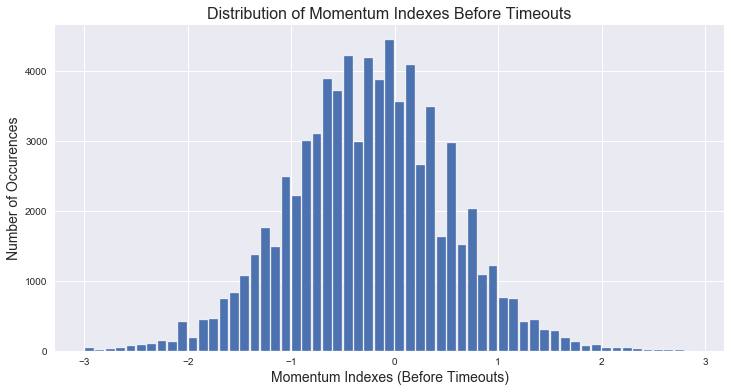

In [169]:
plt.figure(figsize=(12,6))
sns.distplot(momentum_before_df[np.isfinite(momentum_before_df.momentum_index)].momentum_index.values, 
             kde=False, bins=np.arange(-3, 3, 0.1), 
             hist_kws={"rwidth":0.85,'edgecolor':'white', 'alpha':1.0})

plt.title("Distribution of Momentum Indexes Before Timeouts", fontsize=16)
plt.xlabel("Momentum Indexes (Before Timeouts)", fontsize=14)
plt.ylabel("Number of Occurences", fontsize=14);

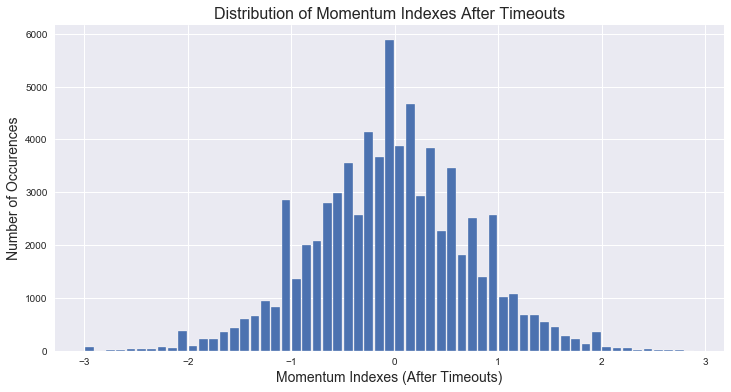

In [170]:
plt.figure(figsize=(12,6))
sns.distplot(momentum_after_df[np.isfinite(momentum_after_df.momentum_index)].momentum_index.values, 
             kde=False, bins=np.arange(-3, 3, 0.1), 
             hist_kws={"rwidth":0.85,'edgecolor':'white', 'alpha':1.0})

plt.title("Distribution of Momentum Indexes After Timeouts", fontsize=16)
plt.xlabel("Momentum Indexes (After Timeouts)", fontsize=14)
plt.ylabel("Number of Occurences", fontsize=14);

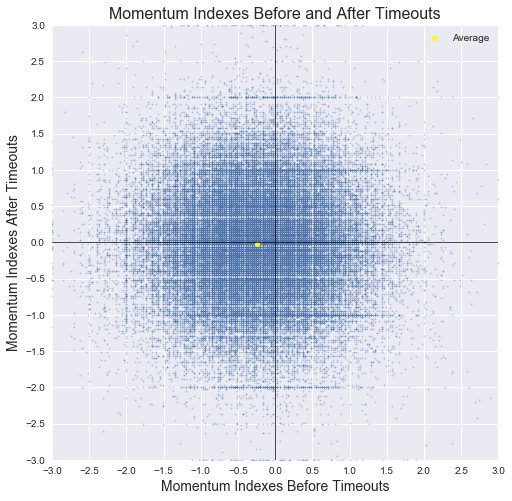

In [380]:
filter_index = (np.isfinite(momentum_before_df.momentum_index) * np.isfinite(momentum_after_df.momentum_index)).values

plt.figure(figsize=(8,8))

plt.axhline(0, c='black', linewidth=0.7)
plt.axvline(0, c='black', linewidth=0.7)
plt.scatter(momentum_before_df[filter_index].momentum_index.values, 
            momentum_after_df[filter_index].momentum_index.values, s = 2, alpha=0.3)
plt.scatter(momentum_before_df[filter_index].momentum_index.values.mean(), 
            momentum_after_df[filter_index].momentum_index.values.mean(), c='yellow', s=25, label="Average")
plt.xticks(np.arange(-3, 3.1, .5))
plt.yticks(np.arange(-3, 3.1, .5))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.title("Momentum Indexes Before and After Timeouts", fontsize=16)
plt.xlabel("Momentum Indexes Before Timeouts", fontsize=14)
plt.ylabel("Momentum Indexes After Timeouts", fontsize=14);

([<matplotlib.axis.YTick at 0x2e0bb2b0>,
 <a list of 13 Text yticklabel objects>)

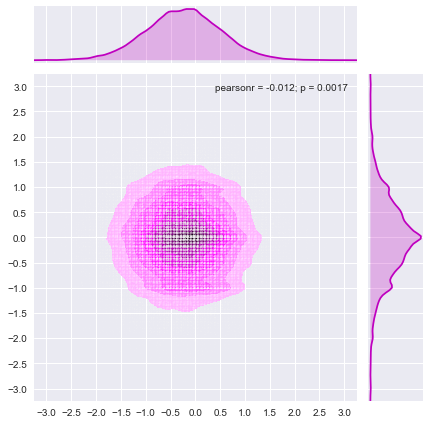

In [444]:
g = sns.jointplot(momentum_before_df[filter_index][(momentum_before_df[filter_index].momentum_index.values <= 3) * 
                                 (momentum_before_df[filter_index].momentum_index.values >= -3) * 
                                 (momentum_after_df[filter_index].momentum_index.values <= 3) * 
                                 (momentum_after_df[filter_index].momentum_index.values >= -3)].momentum_index.values, 
              momentum_after_df[filter_index][(momentum_before_df[filter_index].momentum_index.values <= 3) * 
                                (momentum_before_df[filter_index].momentum_index.values >= -3) * 
                                (momentum_after_df[filter_index].momentum_index.values <= 3) * 
                                (momentum_after_df[filter_index].momentum_index.values >= -3)].momentum_index.values,
              kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=1, linewidth=0.3, marker="+", alpha=0.2)
g.ax_joint.collections[0].set_alpha(0)
plt.xticks(np.arange(-3, 3.1, .5))
plt.yticks(np.arange(-3, 3.1, .5))
# plt.xlim(-3, 3)
# plt.ylim(-3, 3)

# momentum_before_df[filter_index][(momentum_before_df[filter_index].momentum_index.values <= 3) * 
#                                  (momentum_before_df[filter_index].momentum_index.values >= -3) * 
#                                  (momentum_after_df[filter_index].momentum_index.values <= 3) * 
#                                  (momentum_after_df[filter_index].momentum_index.values >= -3)]

In [618]:
len(momentum_before_df)

75388

In [43]:
int('[-1]'[1:-1].split(',')[-1])

-1

In [619]:
def last_arr_value(arrString):
    if len(arrString) == 2:
        return 0
    else:
        return int(arrString[1:-1].split(',')[-1])
    
scores_at_timeouts = momentum_before_df.score_differences.apply(lambda s: last_arr_value(s))

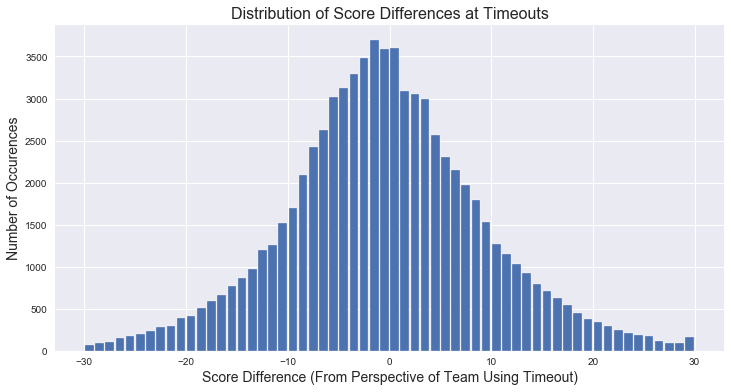

In [64]:
plt.figure(figsize=(12, 6))
sns.distplot(scores_at_timeouts.values, kde=False, bins=np.arange(-30, 31, 1), 
             hist_kws={"rwidth":0.85,'edgecolor':'white', 'alpha':1.0})

plt.title("Distribution of Score Differences at Timeouts", fontsize=16)
plt.xlabel("Score Difference (From Perspective of Team Using Timeout)", fontsize=14)
plt.ylabel("Number of Occurences", fontsize=14);

In [620]:
scores_at_timeouts.mean()

-0.9688942537273837

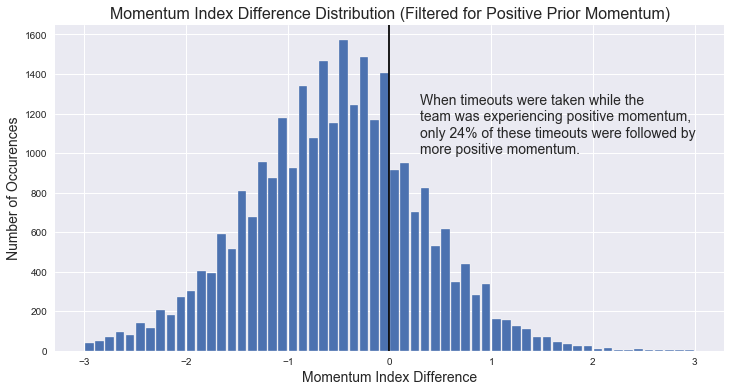

In [151]:
momentum_difference_teams_df = pd.DataFrame({'Team Calling Timeout': list(all_timeouts_df['Team Calling Timeout']), 
                                             'momentum_index_difference': momentum_difference_df})
momentum_filter_index = (momentum_before_df.momentum_index > 0).values
momentum_difference_teams_df = momentum_difference_teams_df[momentum_filter_index]

plt.figure(figsize=(12, 6))

sns.distplot(momentum_difference_teams_df.momentum_index_difference, 
             bins=np.arange(-3, 3.1, .1), kde=False,
             hist_kws={"rwidth":0.85,'edgecolor':'white', 'alpha':1.0});
plt.axvline(0, color="black")
plt.annotate("When timeouts were taken while the \nteam was experiencing positive momentum, \nonly 24% of these timeouts were followed by \nmore positive momentum.", (0.3, 1000), fontsize=14)
plt.title("Momentum Index Difference Distribution (Filtered for Positive Prior Momentum)", fontsize=16)
plt.xlabel("Momentum Index Difference", fontsize=14)
plt.ylabel("Number of Occurences", fontsize=14);

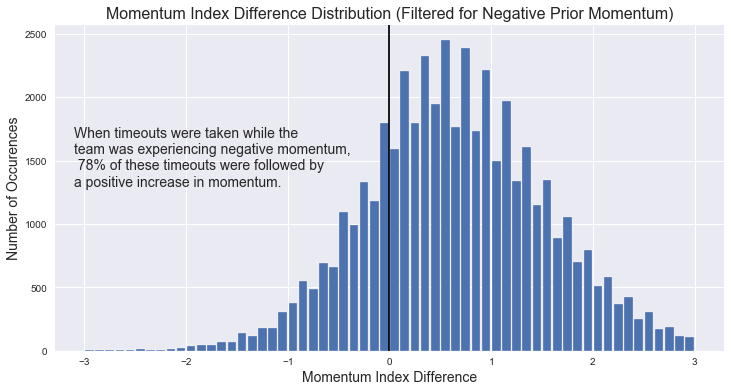

In [163]:
momentum_difference_teams_df = pd.DataFrame({'Team Calling Timeout': list(all_timeouts_df['Team Calling Timeout']), 
                                             'momentum_index_difference': momentum_difference_df})
momentum_filter_index = (momentum_before_df.momentum_index < 0).values
momentum_difference_teams_df = momentum_difference_teams_df[momentum_filter_index]

plt.figure(figsize=(12, 6))

sns.distplot(momentum_difference_teams_df.momentum_index_difference, 
             bins=np.arange(-3, 3.1, .1), kde=False,
             hist_kws={"rwidth":0.85,'edgecolor':'white', 'alpha':1.0});
plt.axvline(0, color="black")
plt.annotate("When timeouts were taken while the \nteam was experiencing negative momentum, \n 78% of these timeouts were followed by \na positive increase in momentum.", 
             (-3.1, 1300), fontsize=14)
plt.title("Momentum Index Difference Distribution (Filtered for Negative Prior Momentum)", fontsize=16)
plt.xlabel("Momentum Index Difference", fontsize=14)
plt.ylabel("Number of Occurences", fontsize=14);

In [159]:
(momentum_difference_teams_df.momentum_index_difference > 0).values.sum() / len(momentum_difference_teams_df)
# (momentum_difference_teams_df.momentum_index_difference < 0).values.sum() / len(momentum_difference_teams_df)

0.77628711813715023

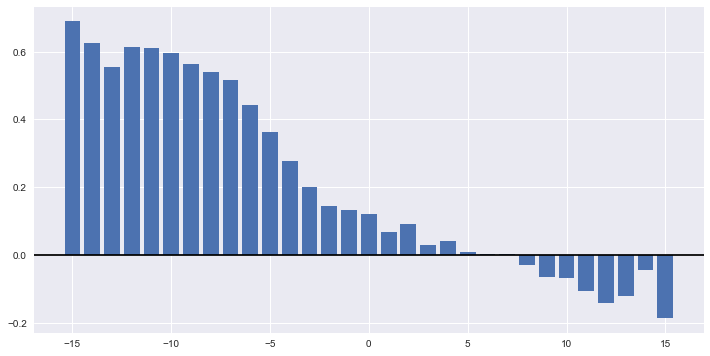

In [188]:
x = np.arange(-15, 15.1, 1)
y = np.zeros(31)
for i in range(len(x)):
    y[i] = momentum_difference_df.values[scores_at_timeouts.values == x[i]].mean()

plt.figure(figsize=(12,6))
plt.axhline(0, color='black')
plt.bar(x, y);

In [189]:
scores_after_timeouts = momentum_after_df.score_differences.apply(lambda s: last_arr_value(s))

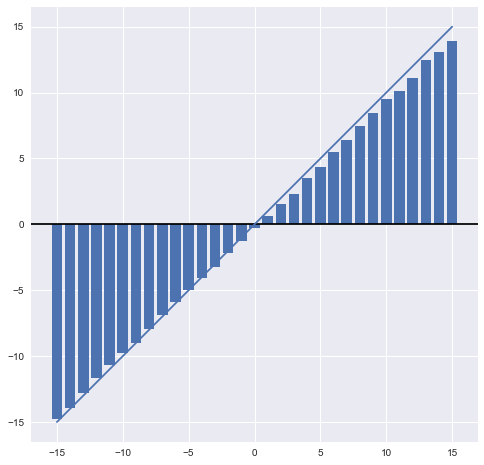

In [194]:
x = np.arange(-15, 15.1, 1)
y = np.zeros(31)
for i in range(len(x)):
    y[i] = scores_after_timeouts.values[scores_at_timeouts.values == x[i]].mean()

plt.figure(figsize=(8,8))
plt.axhline(0, color='black')
plt.plot([-15, 15], [-15, 15])
plt.bar(x, y);

In [230]:
timeout_time_groups = (all_timeouts_df['Time Passed in Game'].values // 100)
print(timeout_time_groups.max())

575


In [231]:
Counter(timeout_time_groups).most_common()

[(286, 1723),
 (287, 1704),
 (285, 1457),
 (284, 1117),
 (54, 928),
 (283, 859),
 (55, 828),
 (126, 799),
 (198, 798),
 (127, 723),
 (282, 681),
 (199, 665),
 (270, 637),
 (128, 603),
 (56, 600),
 (271, 570),
 (36, 556),
 (252, 551),
 (281, 539),
 (108, 518),
 (200, 509),
 (253, 501),
 (109, 493),
 (31, 475),
 (272, 469),
 (269, 468),
 (268, 464),
 (37, 461),
 (57, 460),
 (30, 452),
 (280, 444),
 (279, 441),
 (266, 430),
 (254, 425),
 (32, 424),
 (129, 419),
 (267, 418),
 (143, 415),
 (174, 415),
 (181, 393),
 (278, 393),
 (273, 390),
 (33, 387),
 (180, 379),
 (102, 378),
 (201, 376),
 (255, 376),
 (175, 368),
 (38, 366),
 (176, 359),
 (103, 359),
 (110, 359),
 (90, 358),
 (248, 354),
 (234, 352),
 (247, 349),
 (111, 347),
 (265, 343),
 (250, 342),
 (58, 331),
 (246, 331),
 (235, 329),
 (274, 327),
 (91, 327),
 (232, 324),
 (177, 324),
 (130, 322),
 (141, 321),
 (104, 317),
 (53, 317),
 (34, 317),
 (277, 314),
 (249, 314),
 (106, 312),
 (251, 309),
 (262, 308),
 (107, 307),
 (263, 307)

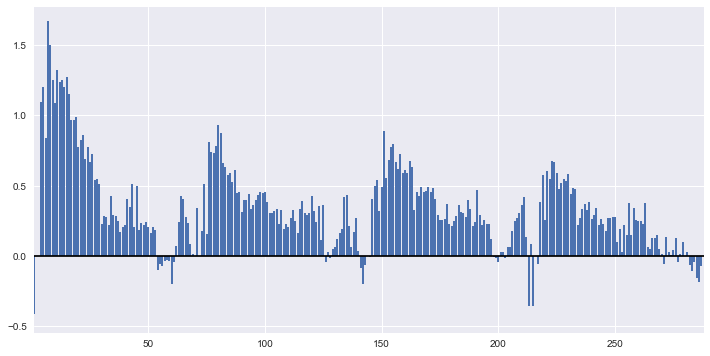

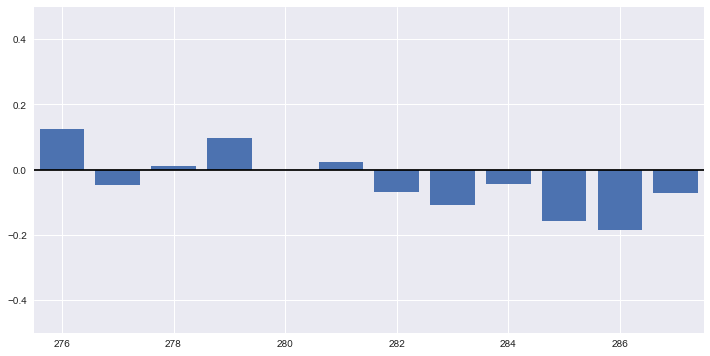

In [305]:
x = np.arange(0, timeout_time_groups.max())
y = np.zeros(len(x))
for time_group in x:
    if (len(momentum_difference_df.values[timeout_time_groups == time_group])) > 5:
        y[time_group] = momentum_difference_df.values[timeout_time_groups == time_group].mean()

plt.figure(figsize=(12,6))
plt.bar(x, y)
plt.axhline(0, color='black')
plt.xlim(1, 288)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x, y)
plt.xlim(275.5, 287.5)
plt.ylim(-0.5, 0.5)
plt.axhline(0, color='black')
plt.show()

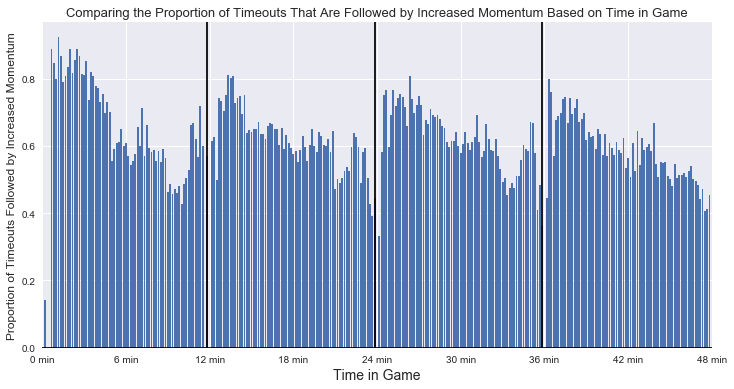

In [288]:
x = np.arange(0, timeout_time_groups.max())
y = np.zeros(len(x))
for time_group in x:
    if (len(momentum_difference_df.values[timeout_time_groups == time_group])) > 5:
        y[time_group] = (momentum_difference_df.values[timeout_time_groups == time_group] > 0).sum() / len(momentum_difference_df.values[timeout_time_groups == time_group])

plt.figure(figsize=(12,6))
plt.bar(x, y)
plt.axhline(0, color='black')
plt.axvline(71, color='black')
plt.axvline(143, color='black')
plt.axvline(215, color='black')
plt.xlim(1, 288)
plt.xlabel('Time in Game', fontsize=14)
plt.ylabel('Proportion of Timeouts Followed by Increased Momentum', fontsize=12)
plt.title('Comparing the Proportion of Timeouts That Are Followed by Increased Momentum Based on Time in Game', fontsize=13)
plt.xticks(np.arange(0, 289, 36), ['0 min', '6 min', '12 min', '18 min', '24 min', '30 min', '36 min', '42 min', '48 min'])
plt.show()

In [312]:
for i in range(200, 250):
    if y[i] < 0: print(i, y[i])

200 -0.0423800168397
203 -0.016369047619
213 -0.355844155844
215 -0.361111111111
217 -0.0603174603175


In [313]:
momentum_difference_df.values[timeout_time_groups == 215].mean()

-0.36111111111111105

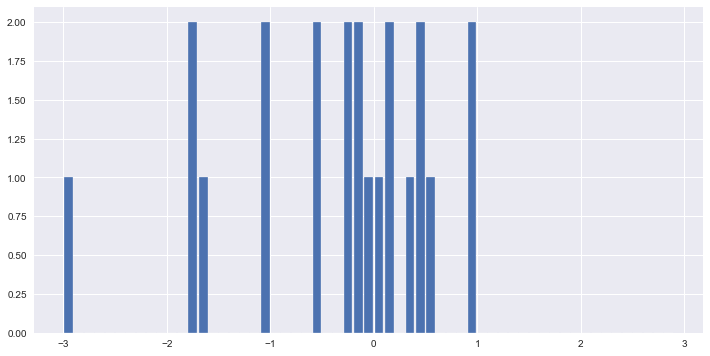

In [315]:
plt.figure(figsize=(12,6))
sns.distplot(momentum_difference_df.values[timeout_time_groups == 213], bins=np.arange(-3,3,0.1), kde=False, 
             hist_kws={"rwidth":0.85,'edgecolor':'white', 'alpha':1.0});

In [275]:
(momentum_difference_df.values[timeout_time_groups == 287] > 0).sum() / len(momentum_difference_df.values[timeout_time_groups == 287]) 

0.45481220657276994

In [403]:
game_results_df = pd.read_csv("Game_Results.csv")
game_results_df

,Game_id,losing_pts,losing_team,winning_pts,winning_team
0,21400001,84,1610612753,101,1610612740
1,21400002,100,1610612742,101,1610612759
2,21400003,90,1610612747,108,1610612745
3,21400004,106,1610612749,108,1610612766
4,21400005,91,1610612755,103,1610612754
5,21400006,105,1610612751,121,1610612738
6,21400007,95,1610612764,107,1610612748
7,21400008,102,1610612737,109,1610612761
8,21400009,101,1610612750,105,1610612763
9,21400010,80,1610612752,104,1610612741


In [345]:
all_timeouts_df

,Game ID,Shot Clock Remaining,Team Calling Timeout,Time Left in Game,Time Left in Quarter,Time Passed in Game
Unnamed: 0,,,,,,
62,21400001,-1,1610612740,24840,3240,3960
95,21400001,20,1610612753,23370,1770,5430
212,21400001,18,1610612753,18320,3920,10480
239,21400001,24,1610612740,16790,2390,12010
274,21400001,-1,1610612753,14744,344,14056
345,21400001,-1,1610612740,10600,3400,18200
382,21400001,17,1610612753,8700,1500,20100
442,21400001,-1,1610612740,5310,5310,23490
505,21400001,19,1610612753,2590,2590,26210


In [347]:
momentum_difference_details_df = pd.DataFrame(momentum_difference_df.copy())
momentum_difference_details_df['Game ID'] = all_timeouts_df['Game ID'].values
momentum_difference_details_df['Team Calling Timeout'] = all_timeouts_df['Team Calling Timeout'].values
momentum_difference_details_df

,momentum_index,Game ID,Team Calling Timeout
0,0.371429,21400001,1610612740
1,0.514286,21400001,1610612753
2,-0.200000,21400001,1610612753
3,-0.314286,21400001,1610612740
4,0.628571,21400001,1610612753
5,-0.142857,21400001,1610612740
6,0.085714,21400001,1610612753
7,0.600000,21400001,1610612740
8,0.057143,21400001,1610612753
9,1.571429,21400001,1610612753


In [366]:
momentum_difference_details_df[(momentum_difference_details_df['Game ID'] == 21400001) & 
                               (momentum_difference_details_df['Team Calling Timeout'] == 1610612740)].momentum_index.mean()

game_results_df[game_results_df.Game_id == 21400001].iloc[0].winning_team

game_data[game_data['Team Calling Timeout'] == 1610612744].momentum_index.mean()

0.44897959183673464

In [372]:
game_data = momentum_difference_details_df[(momentum_difference_details_df['Game ID'] == 21400001)]
winning_team_id = game_results_df[game_results_df.Game_id == game_id].iloc[0].winning_team
game_data
# print(winning_team_id)
# game_data[game_data['Team Calling Timeout'] == winning_team_id]

,momentum_index,Game ID,Team Calling Timeout
0,0.371429,21400001,1610612740
1,0.514286,21400001,1610612753
2,-0.200000,21400001,1610612753
3,-0.314286,21400001,1610612740
4,0.628571,21400001,1610612753
5,-0.142857,21400001,1610612740
6,0.085714,21400001,1610612753
7,0.600000,21400001,1610612740
8,0.057143,21400001,1610612753
9,1.571429,21400001,1610612753


In [435]:
data_store = []
for game_id in game_results_df.Game_id.unique():
    game_data = momentum_difference_details_df[(momentum_difference_details_df['Game ID'] == game_id)]
    winning_team_id = game_results_df[game_results_df.Game_id == game_id].iloc[0].winning_team
    losing_team_id = game_results_df[game_results_df.Game_id == game_id].iloc[0].losing_team
    row_data = {}
    row_data['Game ID'] = game_id
    row_data['Winning Team ID'] = winning_team_id
    row_data['Losing Team ID'] = losing_team_id
    row_data['Winning Team Timeouts Count'] = len(game_data[game_data['Team Calling Timeout'] == winning_team_id].momentum_index)
    row_data['Losing Team Timeouts Count'] = len(game_data[game_data['Team Calling Timeout'] == losing_team_id].momentum_index)
    row_data['Winning Team Momentum Index'] = game_data[game_data['Team Calling Timeout'] == winning_team_id].momentum_index.mean()
    row_data['Losing Team Momentum Index'] = game_data[game_data['Team Calling Timeout'] == losing_team_id].momentum_index.mean()

    data_store.append(row_data)
    
data_store

[{'Game ID': 21400001,
  'Winning Team ID': 1610612740,
  'Losing Team ID': 1610612753,
  'Winning Team Timeouts Count': 4,
  'Losing Team Timeouts Count': 6,
  'Winning Team Momentum Index': 0.1285714285714286,
  'Losing Team Momentum Index': 0.44285714285714284},
 {'Game ID': 21400002,
  'Winning Team ID': 1610612759,
  'Losing Team ID': 1610612742,
  'Winning Team Timeouts Count': 5,
  'Losing Team Timeouts Count': 6,
  'Winning Team Momentum Index': 0.21142857142857147,
  'Losing Team Momentum Index': 0.3428571428571428},
 {'Game ID': 21400003,
  'Winning Team ID': 1610612745,
  'Losing Team ID': 1610612747,
  'Winning Team Timeouts Count': 4,
  'Losing Team Timeouts Count': 5,
  'Winning Team Momentum Index': 0.6214285714285714,
  'Losing Team Momentum Index': 0.5257142857142856},
 {'Game ID': 21400004,
  'Winning Team ID': 1610612766,
  'Losing Team ID': 1610612749,
  'Winning Team Timeouts Count': 9,
  'Losing Team Timeouts Count': 7,
  'Winning Team Momentum Index': 0.796825396

In [436]:
momentum_results_df = pd.DataFrame(data_store)
momentum_results_df

,Game ID,Losing Team ID,Losing Team Momentum Index,Losing Team Timeouts Count,Winning Team ID,Winning Team Momentum Index,Winning Team Timeouts Count
0,21400001,1610612753,0.442857,6,1610612740,0.128571,4
1,21400002,1610612742,0.342857,6,1610612759,0.211429,5
2,21400003,1610612747,0.525714,5,1610612745,0.621429,4
3,21400004,1610612749,0.110204,7,1610612766,0.796825,9
4,21400005,1610612755,0.364286,6,1610612754,0.285714,5
5,21400006,1610612751,0.257143,4,1610612738,-0.128571,4
6,21400007,1610612764,-0.537143,5,1610612748,0.280952,6
7,21400008,1610612737,-0.979592,7,1610612761,0.877551,7
8,21400009,1610612750,0.253061,7,1610612763,0.628571,6
9,21400010,1610612752,0.228571,5,1610612741,0.419048,3


In [432]:
momentum_results_df['Winning Team Momentum Index'].mean() / momentum_results_df['Losing Team Momentum Index'].mean()

1.0611087014090321

In [440]:
momentum_results_df['Winning Team Timeouts Count'].mean()

5.130182926829268

In [441]:
momentum_difference_win_lose = momentum_results_df['Winning Team Momentum Index'].values > momentum_results_df['Losing Team Momentum Index'].values
(momentum_difference_win_lose > 0).sum()/len(momentum_difference_win_lose)

0.52042682926829265

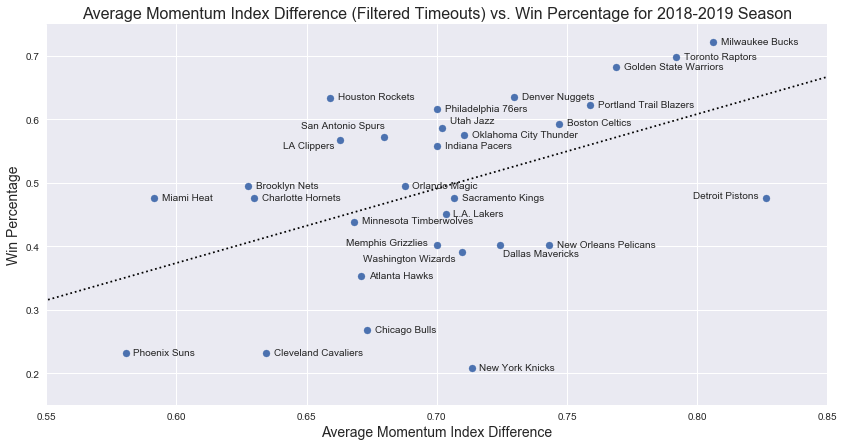

In [606]:
x = []
y = []
for year in ['18']:
    momentum_difference_teams_df = pd.DataFrame({'Team Calling Timeout': list(all_timeouts_df['Team Calling Timeout']), 
                                                 'momentum_index_difference': momentum_difference_df})

    year_index = all_timeouts_df['Game ID'].apply(lambda row: str(row)[1:3]).isin([year]).values
    momentum_filter_index = (momentum_before_df.momentum_index < 0).values
    momentum_difference_teams_df = momentum_difference_teams_df[year_index * momentum_filter_index]

    avg_momentum_difference_teams_df = momentum_difference_teams_df.groupby('Team Calling Timeout').mean().sort_values(['momentum_index_difference'], ascending=False)

    team_names = []
    all_team_ids = list(team_mapping_recent_df.Team_id.unique())

    for team_id, row in avg_momentum_difference_teams_df.iterrows():
        if team_id in all_team_ids:
            team_names.append(team_mapping_recent_df[team_mapping_recent_df.Team_id == team_id].Team_Name.iloc[0])
        else:
            team_names.append(np.NaN)

    avg_momentum_difference_teams_df['team_name'] = team_names
    avg_momentum_difference_teams_df = avg_momentum_difference_teams_df.dropna()

    win_percentages = []
    for team_id in avg_momentum_difference_teams_df.index:
        win_percentages.append(get_win_percentage(team_id, year))

    avg_momentum_difference_teams_df['win_percentage'] = win_percentages

    x += list(avg_momentum_difference_teams_df.momentum_index_difference.values)
    y += list(avg_momentum_difference_teams_df.win_percentage.values)

plt.figure(figsize=(14,7))
plt.scatter(x, y)
plt.plot(np.arange(0,1,0.1), reg.predict(np.arange(0, 1, 0.1)[:, None]), c='black', linestyle=':')
plt.xlim(0.55,0.85)
plt.ylim(0.15,0.75)
plt.title('Average Momentum Index Difference (Filtered Timeouts) vs. Win Percentage for 2018-2019 Season', fontsize=16)
plt.xlabel('Average Momentum Index Difference', fontsize=14)
plt.ylabel('Win Percentage', fontsize=14)
for i, txt in enumerate(avg_momentum_difference_teams_df['team_name']):
    if txt == 'San Antonio Spurs':
        plt.annotate(txt, (x[i]-0.032, y[i]+0.013))
    elif txt == 'Dallas Mavericks':
        plt.annotate(txt, (x[i]+0.001, y[i]-0.018))
    elif txt == 'Utah Jazz':
            plt.annotate(txt, (x[i]+0.003, y[i]+0.008))
    elif txt == 'LA Clippers':
        plt.annotate(txt, (x[i]-0.022, y[i]-0.013))
    elif txt == 'Washington Wizards':
        plt.annotate(txt, (x[i]-0.038, y[i]-0.013))
    elif txt == 'Memphis Grizzlies':
        plt.annotate(txt, (x[i]-0.035, y[i]))
    elif txt == 'Detroit Pistons':
        plt.annotate(txt, (x[i]-0.028, y[i]))
    else:
        plt.annotate(txt, (x[i]+0.003, y[i]-0.003))
        
plt.show()

In [523]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(x)[:, None], np.array(y)[:, None])
reg.coef_
reg.score(np.array(x)[:, None], np.array(y)[:, None])
reg.predict(np.arange(0, 1, 0.1)[:, None])

array([[-0.33090797],
       [-0.21349271],
       [-0.09607744],
       [ 0.02133782],
       [ 0.13875308],
       [ 0.25616835],
       [ 0.37358361],
       [ 0.49099888],
       [ 0.60841414],
       [ 0.7258294 ]])

In [498]:
def get_game_season(game_id):
    return str(game_id)[1:3]

def get_win_percentage(team_id, year):
    try:
        team_id = int(team_id)
        year_index = momentum_results_df['Game ID'].apply(lambda row: str(row)[1:3]).isin([year]).values
        momentum_results_year_df = momentum_results_df[year_index]
        win_count = len(momentum_results_year_df[momentum_results_year_df['Winning Team ID'] == team_id])
        loss_count = len(momentum_results_year_df[momentum_results_year_df['Losing Team ID'] == team_id])
        return win_count/(win_count + loss_count)
    except:
        print(team_id)
        print(year)
        return 1

In [493]:
momentum_results_df[momentum_results_df['Game ID'].apply(lambda row: str(row)[1:3]).isin(['14']).values]

,Game ID,Losing Team ID,Losing Team Momentum Index,Losing Team Timeouts Count,Winning Team ID,Winning Team Momentum Index,Winning Team Timeouts Count
0,21400001,1610612753,0.442857,6,1610612740,0.128571,4
1,21400002,1610612742,0.342857,6,1610612759,0.211429,5
2,21400003,1610612747,0.525714,5,1610612745,0.621429,4
3,21400004,1610612749,0.110204,7,1610612766,0.796825,9
4,21400005,1610612755,0.364286,6,1610612754,0.285714,5
5,21400006,1610612751,0.257143,4,1610612738,-0.128571,4
6,21400007,1610612764,-0.537143,5,1610612748,0.280952,6
7,21400008,1610612737,-0.979592,7,1610612761,0.877551,7
8,21400009,1610612750,0.253061,7,1610612763,0.628571,6
9,21400010,1610612752,0.228571,5,1610612741,0.419048,3


In [434]:
team_timeouts = {}
for team_id in momentum_results_df['Winning Team ID'].unique():
    team_timeouts[time_id] = []
    


30

[[ 1.2]]


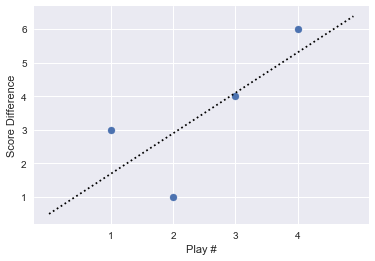

In [613]:
x = [1,2,3,4]
y = [3,1,4,6]
reg = LinearRegression().fit(np.array(x)[:, None], np.array(y)[:, None])
print(reg.coef_)

plt.scatter([1,2,3,4],[3,1,4,6])
plt.plot(np.arange(0,5,0.1), reg.predict(np.arange(0, 5, 0.1)[:, None]), c='black', linestyle=':')
plt.xlabel('Play #')
plt.ylabel('Score Difference')
plt.xticks([1,2,3,4])
plt.yticks([1,2,3,4,5,6]);

[[-1.5]]


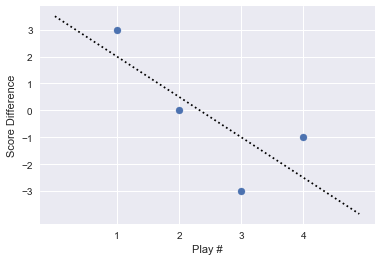

In [617]:
x = [1,2,3,4]
y = [3,0,-3,-1]
reg = LinearRegression().fit(np.array(x)[:, None], np.array(y)[:, None])
print(reg.coef_)

plt.scatter([1,2,3,4],[3,0,-3,-1])
plt.plot(np.arange(0,5,0.1), reg.predict(np.arange(0, 5, 0.1)[:, None]), c='black', linestyle=':')
plt.xlabel('Play #')
plt.ylabel('Score Difference')
plt.xticks([1,2,3,4])
plt.yticks([-3,-2,-1,0,1,2,3]);